# Setup

In [9]:
import sys
assert sys.version_info >= (3, 5)

In [10]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [11]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import glob
import seaborn as sns
import sklearn.linear_model

In [12]:
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

&nbsp;

# Task 1

# Getting the data

Data downloaded from https://www.kaggle.com/unsdsn/world-happiness. The download contained 5 .csv files relating to happiness report data from 2015 to 2019. Because the 2015 to 2017 .csv files were formatted most similar to eachother I decided to combine them in order to have more entries in the dataset (it also means that the 2018 and 2019 files can be kept as unseen testing data). The relevant columns were selected from each of these files using usecols

In [13]:
HAPPINESS_PATH = os.path.join("datasets", "happiness")
# all_files = glob.glob(HAPPINESS_PATH + "/*.csv")
# print(all_files)


def load_happiness_data_2015(happiness_path=HAPPINESS_PATH):
    csv_path = os.path.join(happiness_path, "2015.csv")
    return pd.read_csv(csv_path,usecols=[0,2,3,5,6,7,8,9,10,11])

def load_happiness_data_2016(happiness_path=HAPPINESS_PATH):
    csv_path = os.path.join(happiness_path, "2016.csv")
    return pd.read_csv(csv_path,usecols=[0,2,3,6,7,8,9,10,11,12])

def load_happiness_data_2017(happiness_path=HAPPINESS_PATH):
    csv_path = os.path.join(happiness_path, "2017.csv")
    return pd.read_csv(csv_path,usecols=[0,1,2,5,6,7,8,9,10,11])

Call the functions to load the csv's into their dataframes and appending an extra column to them in order to show what year the data was from. The order of some columns in the 2017 file had to be changed before combining the 3 dataframes into 1.

In [14]:
happiness2015 = load_happiness_data_2015()
happiness2015['Year'] = 2015

happiness2016 = load_happiness_data_2016()
happiness2016['Year'] = 2016

happiness2017 = load_happiness_data_2017()
col_list = list(happiness2017)
col_list[7], col_list[8] = col_list[8], col_list[7]
happiness2017.columns = col_list
happiness2017['Year'] = 2017

frames = [happiness2015, happiness2016, happiness2017]
df = pd.concat(frames)

In [15]:
df.set_index(['Year'])

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,,,,,,,,,,
2015,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
2015,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2015,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
2015,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
2015,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...
2017,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
2017,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
2017,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130


# First look at the data set

Call the .info() method on the data set to print the basic information about the dataframe. By looking at the number of of non-null entries for each attribute it looks as if there are no missing values (missing values might also be filled in with 0's or other values so this could be misleading). The happiness score is made up of the following columns: GDP, Family, Life Expectancy, Freedom, Generosity, Trust, and Dystopia Residual. This means that the data set has 7 different numerical attributes and 1 numerical class attribute (Happiness Score)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    int64  
 2   Happiness Score                470 non-null    float64
 3   Economy (GDP per Capita)       470 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       470 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  470 non-null    float64
 8   Generosity                     470 non-null    float64
 9   Dystopia Residual              470 non-null    float64
 10  Year                           470 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 44.1+ KB


Using the .describe() method on the dataframe to get a statistical summary of the numerical attributes. Looking at the min value of the attributes shows that some have a value of 0, likely indicating that no value was recorded for this entry so a 0 was used instead (missing values that will have to be dealt with).

In [17]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717,2015.993617
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772,0.816907
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720,2017.000000


# Visualising and gaining insight into the data

First a look at the histograms for each of the numerical attributes by using the hist() method. Most of the attributes look fairly evenly distributed, but the two of note are the Trust and Generosity histograms. Both have a similar scale, an outlier at around 0.8, and extend much further to the left of the median (the value in the middle) .

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

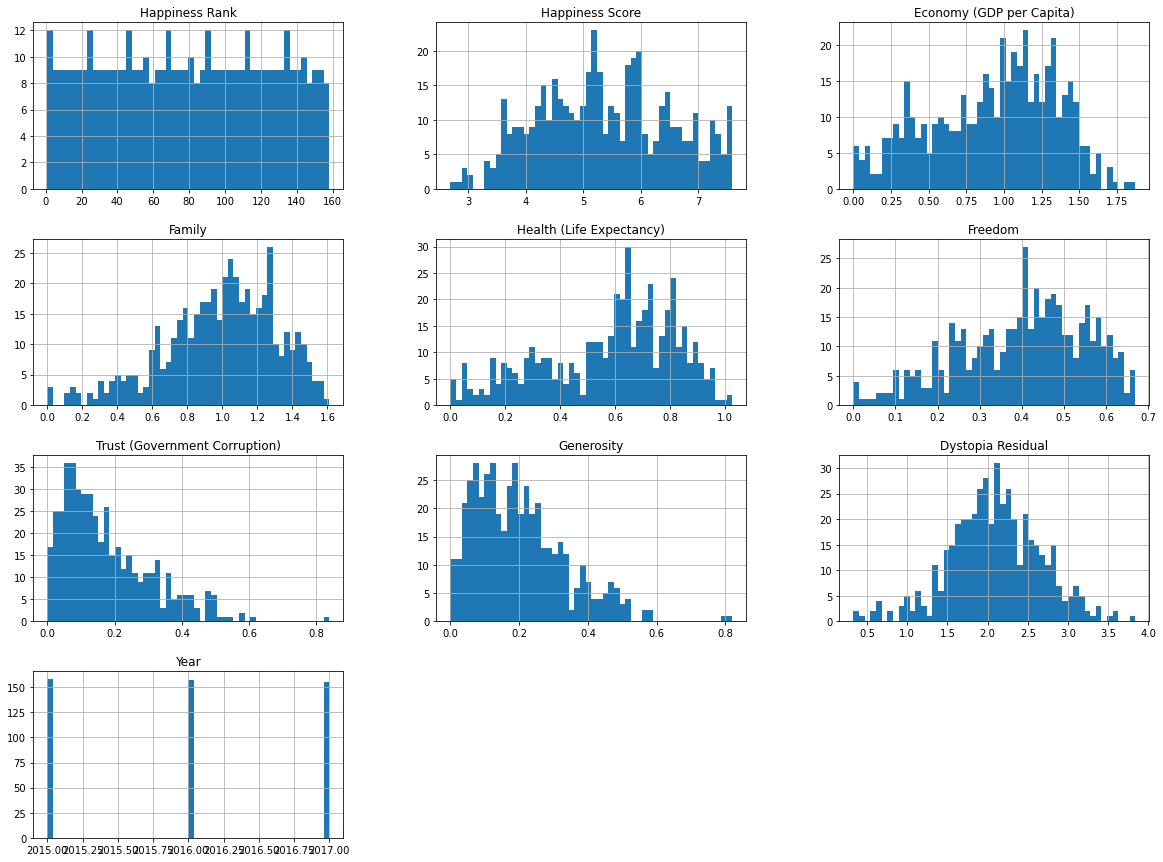

In [18]:
df.hist(bins=50, figsize=(20,15))

Next looks at the correlation between the attributes and the class attribute (Happiness Score). We can see that GDP, Health, and Family have a strong positive correlation with the class attribute. Freedom and Dystopia Residual also correlate quite well with the class attribute. The Trust and Generosity attributes are least correlated with the class attribute. Year and Happiness Rank can be ignored.

In [19]:
corr_matrix = df.corr()
corr_matrix["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.785450
Health (Life Expectancy)         0.748040
Family                           0.636532
Freedom                          0.560353
Dystopia Residual                0.489747
Trust (Government Corruption)    0.282130
Generosity                       0.221684
Year                            -0.007761
Happiness Rank                  -0.993268
Name: Happiness Score, dtype: float64

Having found the 3 attributes that correlate most with the class attribute, the correlation between them can be checked by using pandas scatter_matrix() method. Looking at the scatter plots below it looks like most of the attributes are fairly correlated with eachother. For example, Economy correlates well with all of the other attributes - more money means better healthcare, being able to support bigger families which in turn leads to greater overal happiness. Family on the other hand correlates much less with the other attributes (apart from happiness). Health also correlates well with Economy and Happiness, but not so well with Family.

array([[<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Score'>],
       [<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>],
       [<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Health (Life Expectancy)'>,
        <AxesSubplot:xlabel='Family', ylabel='Health (Life Expectancy)'>],
       [<A

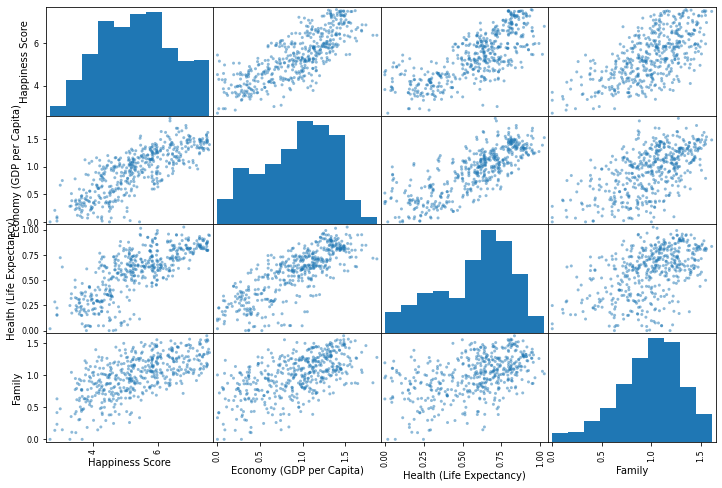

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["Happiness Score","Economy (GDP per Capita)","Health (Life Expectancy)","Family"]
scatter_matrix(df[attributes], figsize=(12,8))

A closer look at the link between GDP and Happiness Score

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

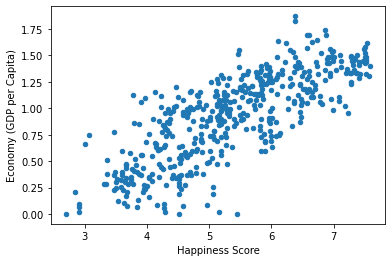

In [21]:
df.plot(kind="scatter", x="Happiness Score", y="Economy (GDP per Capita)")

Experimenting with the alpha value does not tell us much...

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

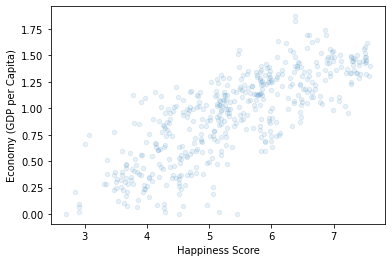

In [22]:
df.plot(kind="scatter", x="Happiness Score", y="Economy (GDP per Capita)", alpha=0.1)

Below is a Spearman correlation matrix - again showing the correlation between the different attributes

In [23]:
spearman_cormatrix = df.corr(method='spearman')
spearman_cormatrix

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,-0.998970,-0.801924,-0.635794,-0.759233,-0.555039,-0.258704,-0.201530,-0.490268,-0.013359
Happiness Score,-0.998970,1.000000,0.800252,0.627502,0.760712,0.554569,0.252305,0.210067,0.497739,-0.002154
Economy (GDP per Capita),-0.801924,0.800252,1.000000,0.584480,0.803493,0.374744,0.200831,0.056290,0.070809,0.140618
Family,-0.635794,0.627502,0.584480,1.000000,0.490872,0.454714,0.306214,-0.105372,-0.077108,0.267470
Health (Life Expectancy),-0.759233,0.760712,0.803493,0.490872,1.000000,0.382680,0.111159,0.172975,0.102379,-0.151467
Freedom,-0.555039,0.554569,0.374744,0.454714,0.382680,1.000000,0.423819,0.376593,0.048817,-0.045556
Trust (Government Corruption),-0.258704,0.252305,0.200831,0.306214,0.111159,0.423819,1.000000,0.023775,-0.111537,0.347216
Generosity,-0.201530,0.210067,0.056290,-0.105372,0.172975,0.376593,0.023775,1.000000,0.146708,-0.400917
Dystopia Residual,-0.490268,0.497739,0.070809,-0.077108,0.102379,0.048817,-0.111537,0.146708,1.000000,-0.190656
Year,-0.013359,-0.002154,0.140618,0.267470,-0.151467,-0.045556,0.347216,-0.400917,-0.190656,1.000000


The scatter graph below plots Happiness for Economy vs. Life Expectancy. This shows that with higher GDP comes greater Life Expectancy which results in a higher Happiness index for that country

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

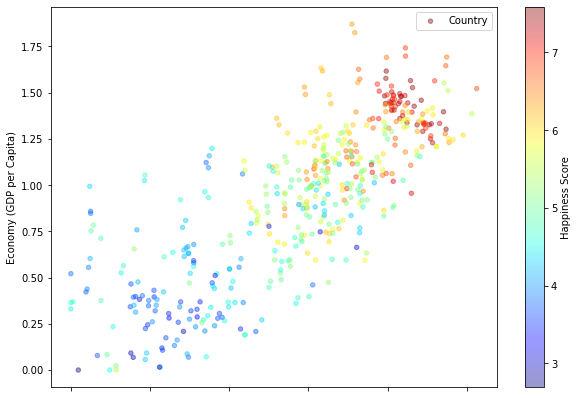

In [24]:
df.plot(kind="scatter", x="Health (Life Expectancy)", y="Economy (GDP per Capita)", alpha=0.4, label="Country", figsize=(10,7),
    c="Happiness Score", cmap=plt.get_cmap("jet"), colorbar=True,
)

# Preparing the Data for Machine Learning Algorithms

## Data Cleaning

As mentioned earlier there may be a few missing values in the dataset that need to be dealt with. The min() method below shows all the attributes with 0 values. Then the rows of these attributes with 0 values can be found in the dataframe. It should be noted that there are no 0 values for the class attribute because it is made up by adding the values from the other attributes - so even if some rows have 0's the class attribute will still have a value.

In [25]:
df.min()

Country                          Afghanistan
Happiness Rank                             1
Happiness Score                        2.693
Economy (GDP per Capita)                 0.0
Family                                   0.0
Health (Life Expectancy)                 0.0
Freedom                                  0.0
Trust (Government Corruption)            0.0
Generosity                               0.0
Dystopia Residual                    0.32858
Year                                    2015
dtype: object

In [26]:
df[df['Economy (GDP per Capita)'] == df['Economy (GDP per Capita)'].min()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
119,Congo (Kinshasa),120,4.517,0.0,1.00120,0.098060,0.226050,0.076250,0.248340,2.867120,2015
75,Somalia,76,5.440,0.0,0.33613,0.114660,0.567780,0.311800,0.272250,3.837720,2016
154,Central African Republic,155,2.693,0.0,0.00000,0.018773,0.270842,0.280876,0.056565,2.066005,2017


In [27]:
df[df['Family'] == df['Family'].min()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
147,Central African Republic,148,3.678,0.07850,0.0,0.066990,0.488790,0.082890,0.238350,2.722300,2015
154,Togo,155,3.303,0.28123,0.0,0.248110,0.346780,0.115870,0.175170,2.135400,2016
154,Central African Republic,155,2.693,0.00000,0.0,0.018773,0.270842,0.280876,0.056565,2.066005,2017


Chose to remove any entries with attributes that were equal to 0

In [28]:
df = df[df["Economy (GDP per Capita)"] != 0]
df = df[df["Family"] != 0]
df = df[df["Health (Life Expectancy)"] != 0]
df = df[df["Freedom"] != 0]
df = df[df["Trust (Government Corruption)"] != 0]
df = df[df["Generosity"] != 0]

Calling .min() again shows that there are no longer any attributes with 0 values

In [29]:
df.min()

Country                          Afghanistan
Happiness Rank                             1
Happiness Score                        2.839
Economy (GDP per Capita)              0.0153
Family                               0.10419
Health (Life Expectancy)            0.005565
Freedom                              0.00589
Trust (Government Corruption)        0.00227
Generosity                           0.00199
Dystopia Residual                    0.32858
Year                                    2015
dtype: object

info() shows that the total number of entries went from 470 to 453

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 153
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        453 non-null    object 
 1   Happiness Rank                 453 non-null    int64  
 2   Happiness Score                453 non-null    float64
 3   Economy (GDP per Capita)       453 non-null    float64
 4   Family                         453 non-null    float64
 5   Health (Life Expectancy)       453 non-null    float64
 6   Freedom                        453 non-null    float64
 7   Trust (Government Corruption)  453 non-null    float64
 8   Generosity                     453 non-null    float64
 9   Dystopia Residual              453 non-null    float64
 10  Year                           453 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 42.5+ KB


Looking back at the histograms it also apears that for some attributes there might be entries that are outliers - namely for the Trust and Generosity attributes. Both show values that are well outside the distribution of the other values - below these entries are identified

In [31]:
df[df["Trust (Government Corruption)"] > 0.8]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
113,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.11529,2017


So, dealing with the Trust outliers first, there is one entry with a value greater than 0.8, which is Myanmar with a value of 0.838075. From earlier we know that the mean value for trust is 0.175605 and the standard deviation is 0.131909. This means that it is almost 4 standard deviations away from the mean and therefore must be an outlier.

In [32]:
df[df["Generosity"] > 0.7]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
128,Myanmar,129,4.307,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,2015
118,Myanmar,119,4.395,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655,2016


Next, dealing with the Generosity outliers we can see that there are two entries above 0.7. The mean value for Generosity is 0.201426 and the std is 0.133211. This means that both of these entries are almost 5 standard deviations away from the mean which means that they must be outliers. The entries identified above are removed

In [33]:
df = df[df["Trust (Government Corruption)"] < 0.8]
df = df[df["Generosity"] < 0.7]
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,77.193333,5.410982,0.943585,1.000786,0.589481,0.408766,0.176419,0.200033,2.091904,2015.995556
std,45.299503,1.135653,0.408276,0.311389,0.232153,0.145706,0.129060,0.127283,0.562699,0.817393
min,1.000000,2.839000,0.015300,0.104190,0.005565,0.005890,0.002270,0.001990,0.328580,2015.000000
25%,38.000000,4.515000,0.638553,0.803849,0.430768,0.307313,0.076013,0.098687,1.737975,2015.000000
50%,76.000000,5.334000,1.008205,1.032890,0.633718,0.423223,0.142000,0.181624,2.096114,2016.000000
75%,116.000000,6.301000,1.270355,1.237453,0.774117,0.521346,0.250630,0.276476,2.453263,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.611705,0.586960,3.602140,2017.000000


Note that the mean value for Trust increased after removing a very high value (why?)

## Attribute Selection

In [34]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


First nominal attributes like Country and Rank (maybe not nominal but is not of any use). This will form the first dataset

In [35]:
df1 = df.drop(columns=["Country","Happiness Rank"])
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...
149,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,2017
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017


Now a filter method can be applied by using a correlation matrix (Pearson correlation). All attributes with a correlation greater than 0.3 are kept to form the second dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,2.517380
1,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,2.702010
2,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,2.492040
3,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,2.465310
4,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,2.451760
...,...,...,...,...,...,...,...
149,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,1.837229
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.621130


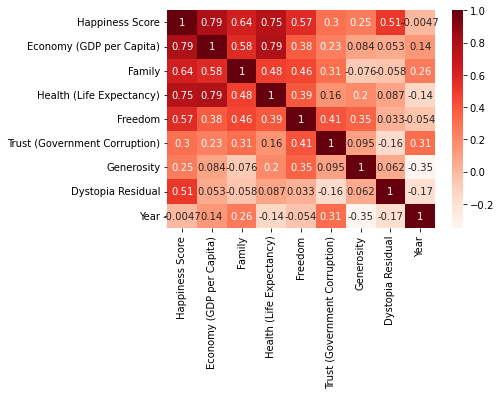

In [36]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
# sets the correlation target to the class attribute
cor_target = abs(corr["Happiness Score"])
# then highly correlated features can be selected
relevant_attr1 = cor_target[cor_target>0.3]
df2 = df1.drop(columns=["Year","Generosity"])
df2

The same filter method is applied again but only attributes with a correlation greater than 0.6 (with the class attribute) are kept to form the third dataset.

In [37]:
relevant_attr2 = cor_target[cor_target>0.6]
relevant_attr2
df3 = df2.drop(columns=["Freedom","Trust (Government Corruption)","Dystopia Residual"])
df3

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
0,7.587,1.396510,1.349510,0.941430
1,7.561,1.302320,1.402230,0.947840
2,7.527,1.325480,1.360580,0.874640
3,7.522,1.459000,1.330950,0.885210
4,7.427,1.326290,1.322610,0.905630
...,...,...,...,...
149,3.495,0.305445,0.431883,0.247106
150,3.471,0.368746,0.945707,0.326425
151,3.462,0.777153,0.396103,0.500533
152,3.349,0.511136,1.041990,0.364509


# Naïve Bayes Classifier

## Chossing the Classifier

Below several different Naive Bayes Classifiers are tested to see which one gives the best outcome. To perform any of the classifiers on the original dataset, nominal attributes in the dataset had to be turned into numerical ones, which was done by using the LabelEncoder() method. The class attribute is also split into five different classes in order to do cross-validation later on (I left in an example a bit further down to show the error on the non-binned class attribute). Note here that with the fewer number of bins the classifier becomes more accurate because it doesn't have to be as precise with its prediction (wider bins makes it easier). Also when equal frequency binning is used (qcut) the accuracy of the model for the original dataset increases slighlty, but the accuracy of the models for all the other datasets decreases slightly (so just used cut in the end)

<AxesSubplot:>

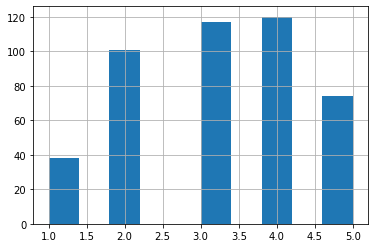

In [38]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn import preprocessing

clfG = GaussianNB()
clfM = MultinomialNB()
clfC = ComplementNB()
clfB = BernoulliNB()

le = preprocessing.LabelEncoder()

df_copy = df.copy()

df_copy["Country"] = le.fit_transform(df_copy["Country"])

# need classes to do cross-validation so Happiness Score is split into bins below 
# Leave-one-out cross-validation would be better for this small dataset
df_copy["Happiness Bins"] = pd.cut(df_copy["Happiness Score"],5,labels=[1,2,3,4,5])
df_copy = df_copy.drop(["Happiness Score"],axis=1)
df_copy

y = df_copy["Happiness Bins"]
x = df_copy.drop(["Happiness Bins"],axis=1)

y.hist()

### Gaussian

This ended up being the best classifier to use on the dataset. Looking back at the histograms from earlier, they display mostly Gaussian distributions so it makes sense that this Naive Bayes model would work best

In [39]:
clfG.fit(x,y)
# a quick way to get the accuracy from the classifier (returns the mean accuracy on the given test data and labels) using
# the same attributes values and class attribute values that the model learned from.
clfG.score(x,y)

0.9155555555555556

### Multinomial

In [40]:
clfM.fit(x,y)
clfM.score(x,y)

0.7955555555555556

### Complement

In [41]:
clfC.fit(x,y)
clfC.score(x,y)

0.46444444444444444

### Bernoulli

In [42]:
clfB.fit(x,y)
clfB.score(x,y)

0.27111111111111114

## Metrics

### Measuring Accuracy Using Cross-Validation

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict

acc_score = cross_val_score(clfG,x,y,cv=3,scoring="accuracy")
acc_score

array([0.89333333, 0.88666667, 0.83333333])

### Confusion Matrix

This data is a Multi-Class Classification problem and not a Binary one which makes the confusion matrix slightly harder to interpret. Firstly, cross-validation is used to predict some class values and a confusion matrix is constructed with the actual class values and the new vaues

<AxesSubplot:>

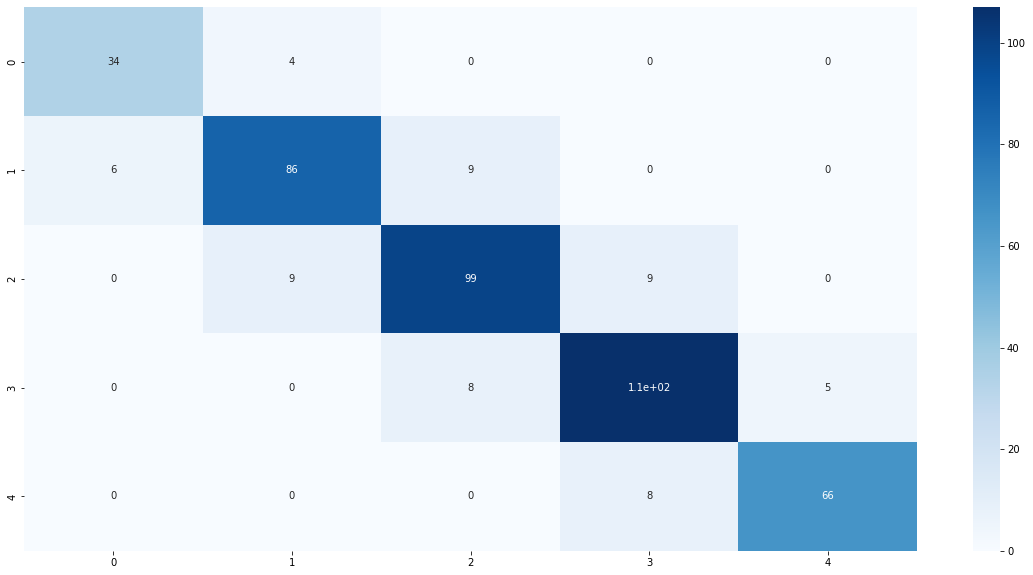

In [44]:
from sklearn.metrics import confusion_matrix

yPred = cross_val_predict(clfG,x,y,cv=3)
cm = confusion_matrix(y, yPred)

hm = pd.DataFrame(cm)
plt.figure(figsize = (20,10))
sns.heatmap(hm, annot=True,cmap='Blues')

### TP and FP Rate

The TP and FP rates (as well as the FN and TN Rates) can be calculated from the confusion matrix as is shown in the example below (from: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
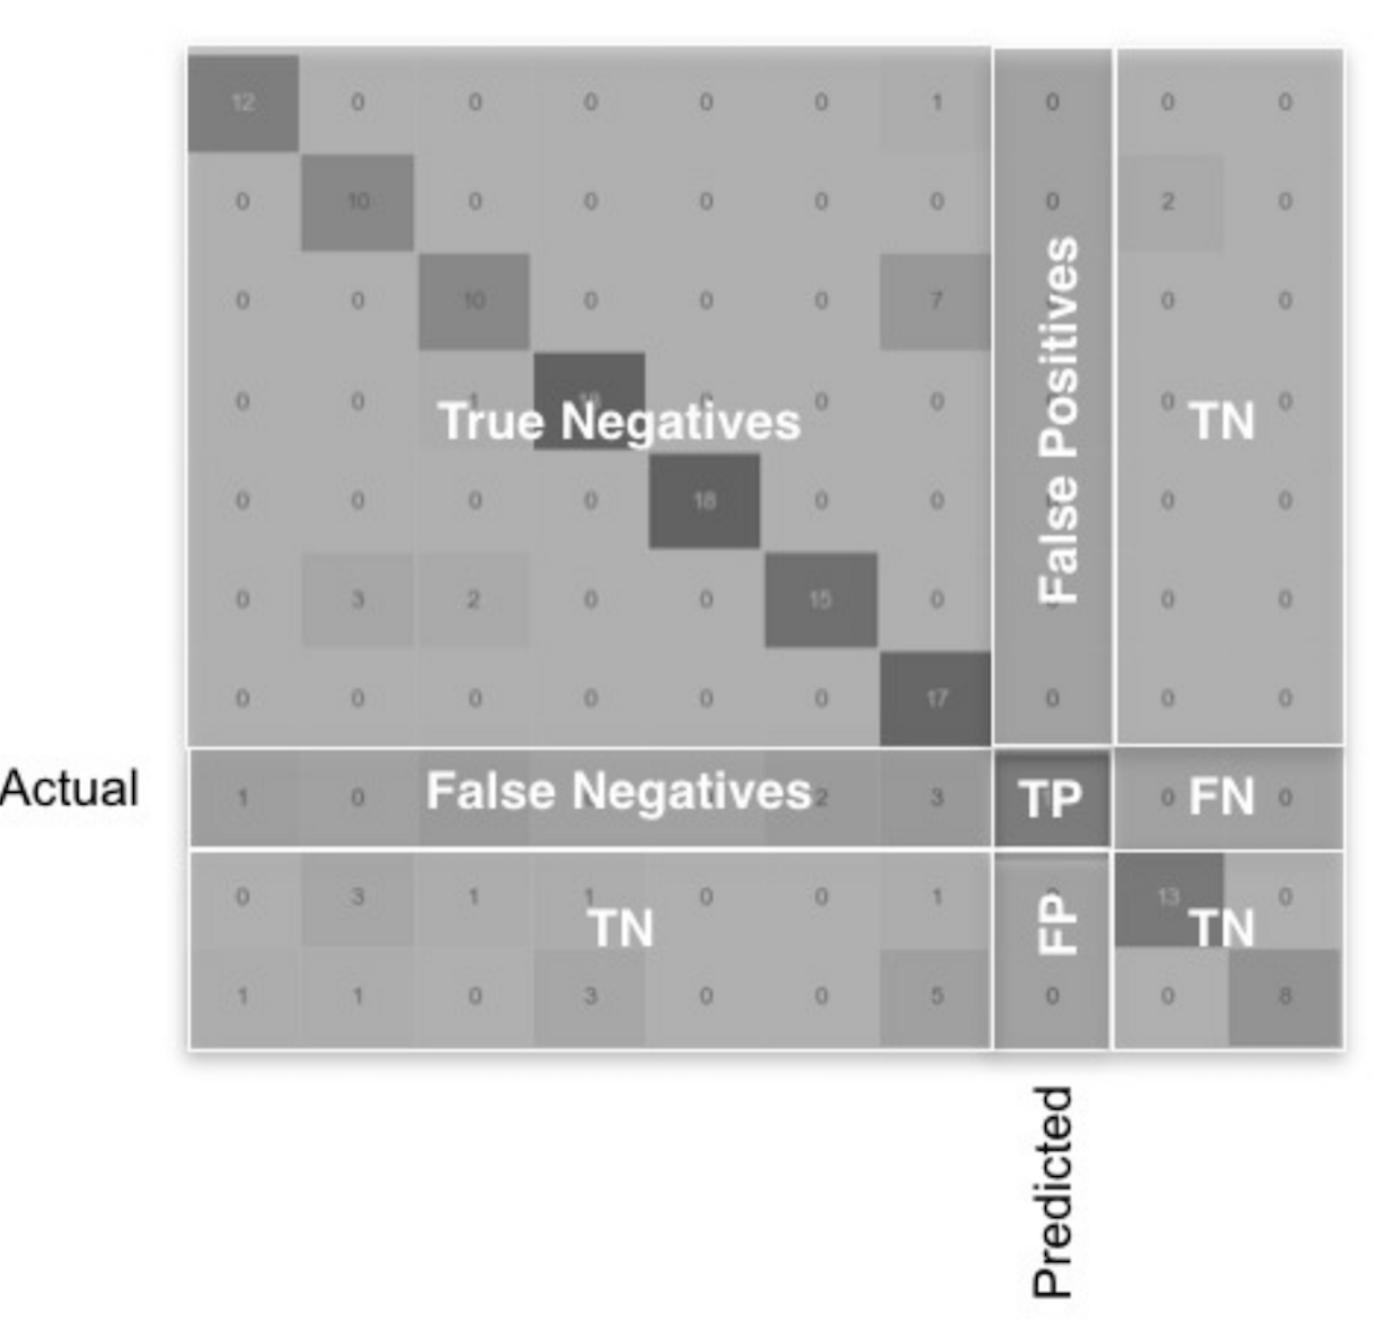

In [45]:
# convert to float to get other metrics later on (need to do devision so need float)
FP = (cm.sum(axis=0) - np.diag(cm) ).astype(float)
FN = (cm.sum(axis=1) - np.diag(cm)).astype(float)
TP = (np.diag(cm)).astype(float)
TN = (cm.sum() - (FP + FN + TP)).astype(float)

In [46]:
TP

array([ 34.,  86.,  99., 107.,  66.])

In [47]:
FP

array([ 6., 13., 17., 17.,  5.])

### Precission, Recall, and F-Measure

Precison, Recall and F-Measure could all be calculated using the values above, but it's simpler just to use precission_score and recall_score from the sklearn metrics library

### Precission

Tells you what fraction of predictions as a positive class were actually positive.

You can get the same value as below by averaging the FP and TP values for all the classes and then using the formula:

precision = TP/(TP+FP) = 78.4/(78.4 + 11.6) = 0.8711111111111 (because 'macro' is used as the average below the two results are slightly different)

In [48]:
from sklearn.metrics import precision_score

# because it's multi-class the TP and FP values need to be averaged across the different classes and here 'macro' is used 
# to do this (Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into
# account)
p_score = precision_score(y, yPred, average='macro')
p_score

0.8729231670288243

### Recall

Tells you what fraction of all positive samples were correctly predicted as positive by the classifier (also known as True Positive Rate (TPR), Sensitivity)

In [49]:
from sklearn.metrics import recall_score

r_score = recall_score(y, yPred, average='macro')
r_score

0.8751868790665039

### F-Measure

Combines precision and recall into a single measure. Want a model that has a precision of 1 and a recall of 1. That means a F1-score of 1, i.e. a 100% accuracy

In [50]:
from sklearn.metrics import f1_score

f_score = f1_score(y, yPred,average='macro')
f_score

0.8737948574868539

### AUC-ROC

"A machine learning classification model can be used to predict the actual class of the data point directly or predict its probability of belonging to different classes. The latter gives us more control over the result. We can determine our own threshold to interpret the result of the classifier. This is sometimes more prudent than just building a completely new model!

Setting different thresholds for classifying positive class for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.

The metrics change with the changing threshold values. We can generate different confusion matrices and compare the various metrics that we discussed in the previous section. But that would not be a prudent thing to do. Instead, what we can do is generate a plot between some of these metrics so that we can easily visualize which threshold is giving us a better result.

The AUC-ROC curve solves just that problem!

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes." (https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

In [51]:
from sklearn.metrics import roc_auc_score

predProb = clfG.predict_proba(x)
score = roc_auc_score(y, predProb, average='macro',multi_class='ovr')
score

0.9932884673714026

In [52]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn import preprocessing

# clf2 = GaussianNB()
# le = preprocessing.LabelEncoder()

# df3_copy2 = df3.copy()
# df3_copy2["Happiness Score"] = le.fit_transform(df3_copy2["Happiness Score"])

# y = df3_copy2["Happiness Score"]
# x = df3_copy2.drop(["Happiness Score"],axis=1)

# clf2.fit(x,y)
# clf2.score(x,y)

In [53]:
# cross_val_score(clf2,x,y,cv=3,scoring="accuracy")

Running the code above gives the following error: n_splits=3 cannot be greater than the number of members in each class.

Thats why I had to bin the class attribute in order to do cross-validation

## Dataset 1

### Running the classifier

In [54]:
clfG1 = GaussianNB()

df1_copy = df1.copy()

# make bins again
df1_copy["Happiness Bins"] = pd.cut(df1_copy["Happiness Score"],5,labels=[1,2,3,4,5])
df1_copy = df1_copy.drop(["Happiness Score"],axis=1)

y1 = df1_copy["Happiness Bins"]
x1 = df1_copy.drop(["Happiness Bins"],axis=1)

In [55]:
clfG1.fit(x1,y1)
clfG1.score(x1,y1)

0.68

### Metrics

### Accuracy Using Cross-Validation

In [56]:
acc_score1 = cross_val_score(clfG1,x1,y1,cv=3,scoring="accuracy")
acc_score1

array([0.68, 0.62, 0.56])

### Confusion Matrix

<AxesSubplot:>

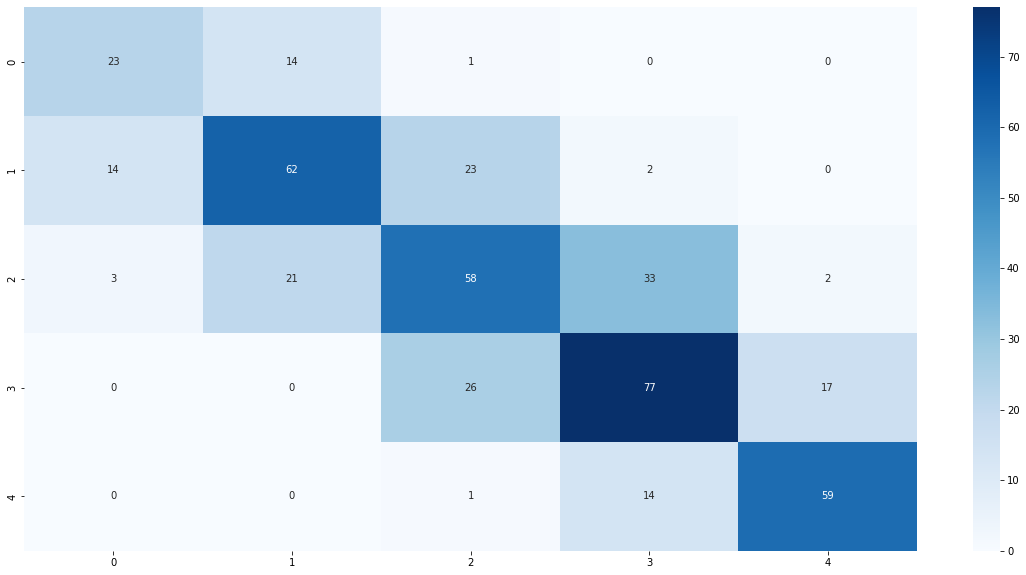

In [57]:
yPred1 = cross_val_predict(clfG1,x1,y1,cv=3)
cm1 = confusion_matrix(y1, yPred1)

hm1 = pd.DataFrame(cm1)
plt.figure(figsize = (20,10))
sns.heatmap(hm1, annot=True,cmap='Blues')

### TP and FP Rate

In [58]:
FP1 = (cm1.sum(axis=0) - np.diag(cm1) ).astype(float)
FN1 = (cm1.sum(axis=1) - np.diag(cm1)).astype(float)
TP1 = (np.diag(cm1)).astype(float)
TN1 = (cm1.sum() - (FP1 + FN1 + TP1)).astype(float)
FP1

array([17., 35., 51., 49., 19.])

### Precission, Recall, and F-Measure

### Precission

In [59]:
p_score1 = precision_score(y1, yPred1, average='macro')
p_score1

0.6227613433992891

### Recall

In [60]:
r_score1 = recall_score(y1, yPred1, average='macro')
r_score1

0.6307630007447621

### F-Measure

In [61]:
f_score1 = f1_score(y1, yPred1,average='macro')
f_score1

0.6263225203851375

### AUC-ROC

In [62]:
predProb1 = clfG1.predict_proba(x1)
score1 = roc_auc_score(y1, predProb1, average='macro',multi_class='ovr')
score1

0.9230776326015968

## Dataset 2

### Running the classifier

In [63]:
clfG2 = GaussianNB()

df2_copy = df2.copy()

# make bins again
df2_copy["Happiness Bins"] = pd.cut(df2_copy["Happiness Score"],5,labels=[1,2,3,4,5])
df2_copy = df2_copy.drop(["Happiness Score"],axis=1)

y2 = df2_copy["Happiness Bins"]
x2 = df2_copy.drop(["Happiness Bins"],axis=1)

In [64]:
clfG2.fit(x2,y2)
clfG2.score(x2,y2)

0.68

### Metrics

### Accuracy Using Cross-Validation

In [65]:
acc_score2 = cross_val_score(clfG2,x2,y2,cv=3,scoring="accuracy")
acc_score2

array([0.69333333, 0.64      , 0.55333333])

### Confusion Matrix

<AxesSubplot:>

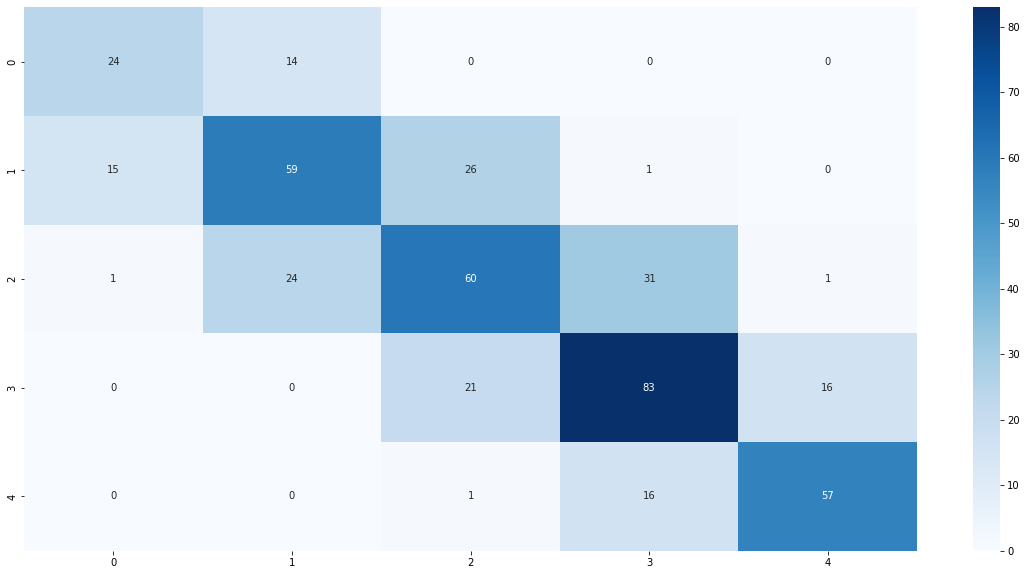

In [66]:
yPred2 = cross_val_predict(clfG2,x2,y2,cv=3)
cm2 = confusion_matrix(y2, yPred2)

hm2 = pd.DataFrame(cm2)
plt.figure(figsize = (20,10))
sns.heatmap(hm2, annot=True,cmap='Blues')

### TP and FP Rate

In [67]:
FP2 = (cm2.sum(axis=0) - np.diag(cm2) ).astype(float)
FN2 = (cm2.sum(axis=1) - np.diag(cm2)).astype(float)
TP2 = (np.diag(cm2)).astype(float)
TN2 = (cm2.sum() - (FP2 + FN2 + TP2)).astype(float)

### Precission, Recall, and F-Measure

### Precission

In [68]:
p_score2 = precision_score(y2, yPred2, average='macro')
p_score2

0.6335322069531559

### Recall

In [69]:
r_score2 = recall_score(y2, yPred2, average='macro')
r_score2

0.6380989625934909

### F-Measure

In [70]:
f_score2 = f1_score(y2, yPred2,average='macro')
f_score2

0.6352604793242242

### AUC-ROC

In [71]:
predProb2 = clfG2.predict_proba(x2)
score2 = roc_auc_score(y2, predProb2, average='macro',multi_class='ovr')
score2

0.9206704863074433

## Dataset 3

### Running the classifier

In [72]:
clfG3 = GaussianNB()

df3_copy = df3.copy()

# make bins again
df3_copy["Happiness Bins"] = pd.cut(df3_copy["Happiness Score"],5,labels=[1,2,3,4,5])
df3_copy = df3_copy.drop(["Happiness Score"],axis=1)

y3 = df3_copy["Happiness Bins"]
x3 = df3_copy.drop(["Happiness Bins"],axis=1)

In [73]:
clfG3.fit(x3,y3)
clfG3.score(x3,y3)

0.5511111111111111

### Metrics

### Accuracy Using Cross-Validation

In [74]:
acc_score3 = cross_val_score(clfG3,x3,y3,cv=3,scoring="accuracy")
acc_score3

array([0.55333333, 0.55333333, 0.56      ])

### Confusion Matrix

<AxesSubplot:>

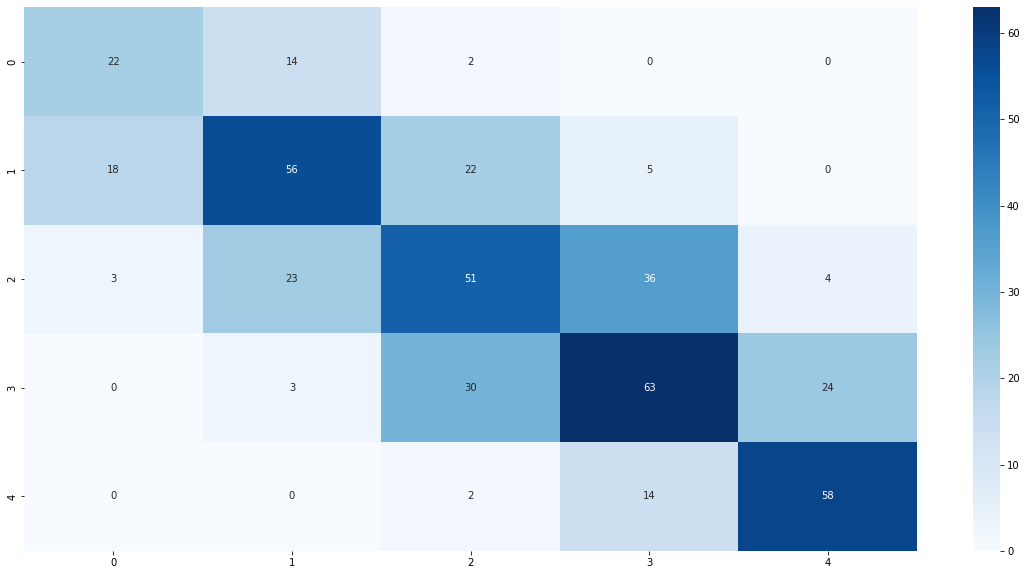

In [75]:
yPred3 = cross_val_predict(clfG3,x3,y3,cv=3)
cm3 = confusion_matrix(y3, yPred3)

hm3 = pd.DataFrame(cm3)
plt.figure(figsize = (20,10))
sns.heatmap(hm3, annot=True,cmap='Blues')

### TP and FP Rate

In [76]:
FP3 = (cm3.sum(axis=0) - np.diag(cm3) ).astype(float)
FN3 = (cm3.sum(axis=1) - np.diag(cm3)).astype(float)
TP3 = (np.diag(cm3)).astype(float)
TN3 = (cm3.sum() - (FP3 + FN3 + TP3)).astype(float)

### Precission, Recall, and F-Measure

### Precission

In [77]:
p_score3 = precision_score(y3, yPred3, average='macro')
p_score3

0.5559827328129355

### Recall

In [78]:
r_score3 = recall_score(y3, yPred3, average='macro')
r_score3

0.5756168067293654

### F-Measure

In [79]:
f_score3 = f1_score(y3, yPred3,average='macro')
f_score3

0.5643013405775922

### AUC-ROC

In [80]:
predProb3 = clfG3.predict_proba(x3)
score3 = roc_auc_score(y3, predProb3, average='macro',multi_class='ovr')
score3

0.8617021596758809

## Results

In [81]:
results_data = {'Accuracy': [np.mean(acc_score), np.mean(acc_score1), np.mean(acc_score2), np.mean(acc_score3)],
                'Precision': [p_score, p_score1, p_score2, p_score3], 
                'Recall': [r_score, r_score1, r_score2, r_score3], 
                'F-Measure': [f_score, f_score1, f_score2, f_score3], 
                'AUC-ROC': [score, score1, score2, score3]}
df_res = pd.DataFrame(data=results_data)
df_res.index = ["Original Dataset", "Dataset 1", "Dataset 2", "Dataset 3"]
df_res

,Accuracy,Precision,Recall,F-Measure,AUC-ROC
Original Dataset,0.871111,0.872923,0.875187,0.873795,0.993288
Dataset 1,0.620000,0.622761,0.630763,0.626323,0.923078
Dataset 2,0.628889,0.633532,0.638099,0.635260,0.920670
Dataset 3,0.555556,0.555983,0.575617,0.564301,0.861702


<AxesSubplot:>

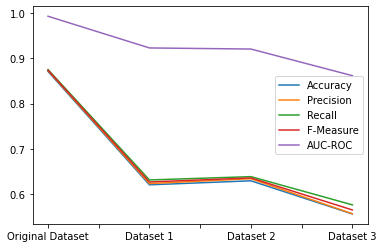

In [82]:
df_res.plot.line()

In [83]:
# for tests sake, get rid of Happiness Rank from the original dataset to see how the model performs
# having Happiness Rank in the training set is like have the class attribute itself in the training set
x = df_copy.drop(["Happiness Rank", "Happiness Bins"],axis=1)
clfG.fit(x,y)
clfG.score(x,y)
# accuracy is a lot worse but still better than the other datasets

0.6955555555555556

**Recall**
 - It measures how many observations out of all positive observations have we classified as positive
 
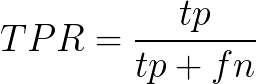

**Precision**
 - It measures how many observations predicted as positive are in fact positive.
 
 
 
**Accuracy**
 - It measures how many observations, both positive and negative, were correctly classified.
 - You shouldn’t use accuracy on imbalanced problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the majority class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.
 - even though each class doesn't have the same number of entries (Gaussian distribution), there is not a majority class
 
**F-Measure**
 - Combines Recall and Precision

For each dataset, the values across all the metrics are very similar. Because the Recall and Precision values for each dataset are so similar it can be said that the model has classified an equal amount of examples as false positives as it has false negatives - or another way of putting it; the model is equally good at assigning positive classifications correctly as it at classifying positive examples correcly. Also because these two metrics are so similar, the F-Measure also ends up being very similar too, as it is the harmonic mean between the two.

For all the datasets the AUC-ROC score ends up being much higher than Accuracy score. In all cases the AUC score is much greater than 0.5 meaning there is a very high chance that the classifier will be able to distinguish the positive class values from the negative class values (AUC of 0.5 would mean that the classifier is just predicting a random class)

The Accuracy score in this instance is a good measure of performance because there are multiple different classes, it would be difficult for the model to have high Accuracy simply by guessing that an example belongs to a certain class (no real majority class). However, if the model were only predicting entries for the lowest bin, which accounts for only 8% of the entries, then the model would be able to guess that all the entries aren't in that class and have an Accuracy score of 92%.

&nbsp;

# Part 2

## K-Means Clustering

In [76]:
from sklearn.cluster import KMeans

In [77]:
# taking examples from dataset 2 with the class attribute removed
examples = df2.drop(columns=["Happiness Score"])
examples

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.396510,1.349510,0.941430,0.665570,0.419780,2.517380
1,1.302320,1.402230,0.947840,0.628770,0.141450,2.702010
2,1.325480,1.360580,0.874640,0.649380,0.483570,2.492040
3,1.459000,1.330950,0.885210,0.669730,0.365030,2.465310
4,1.326290,1.322610,0.905630,0.632970,0.329570,2.451760
...,...,...,...,...,...,...
149,0.305445,0.431883,0.247106,0.380426,0.196896,1.837229
150,0.368746,0.945707,0.326425,0.581844,0.252756,0.540061
151,0.777153,0.396103,0.500533,0.081539,0.493664,1.061574
152,0.511136,1.041990,0.364509,0.390018,0.354256,0.621130


In [78]:
k = 5 
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(examples)
y_pred

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 4, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 4, 1, 4, 3, 1, 4, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 4, 3, 4, 1, 3, 1, 3,
       1, 3, 1, 1, 4, 3, 4, 1, 3, 3, 3, 1, 1, 3, 4, 3, 4, 3, 3, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 2, 4, 2, 0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 4,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 4, 1, 3, 3, 1, 3, 3, 4, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3,

In [79]:
y_pred is kmeans.labels_

True

In [80]:
kmeans.cluster_centers_

array([[1.33639979, 1.23018441, 0.77556976, 0.48053227, 0.23760136,
        2.1053233 ],
       [0.80621401, 0.96266047, 0.53248883, 0.37182485, 0.14316816,
        1.78649284],
       [1.05640706, 1.00298652, 0.66132729, 0.42062099, 0.13093272,
        2.83672325],
       [0.3670176 , 0.65794862, 0.28590798, 0.32116103, 0.14885287,
        2.20206845],
       [1.01723249, 1.08017768, 0.62590287, 0.43766896, 0.22930882,
        0.98935145]])

In [81]:
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 4, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 4, 1, 4, 3, 1, 4, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 4, 3, 4, 1, 3, 1, 3,
       1, 3, 1, 1, 4, 3, 4, 1, 3, 3, 3, 1, 1, 3, 4, 3, 4, 3, 3, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 2, 4, 2, 0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 4,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 4, 1, 3, 3, 1, 3, 3, 4, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3,

### The section below uses only two attributes so the model's decision boundaries can be plotted

In [82]:
examples2 = df2.drop(columns=["Happiness Score", "Family", "Freedom", "Trust (Government Corruption)", "Dystopia Residual"])
examples2

,Economy (GDP per Capita),Health (Life Expectancy)
0,1.396510,0.941430
1,1.302320,0.947840
2,1.325480,0.874640
3,1.459000,0.885210
4,1.326290,0.905630
...,...,...
149,0.305445,0.247106
150,0.368746,0.326425
151,0.777153,0.500533
152,0.511136,0.364509


In [83]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
y_pred2 = kmeans2.fit_predict(examples2)

In [84]:
y_pred2 is kmeans2.labels_

True

In [85]:
kmeans2.cluster_centers_

array([[1.42129578, 0.83477676],
       [0.28978476, 0.27739507],
       [0.77832304, 0.60434907],
       [0.69241284, 0.25484366],
       [1.11414757, 0.65612637]])

In [86]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 2, 4, 0, 0, 0, 0, 0, 4, 4, 2, 2, 2,
       4, 0, 0, 2, 0, 0, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 0,
       0, 2, 2, 2, 4, 0, 4, 2, 4, 2, 3, 2, 4, 2, 2, 4, 2, 1, 4, 2, 4, 4,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 4, 4, 2, 1, 2, 2, 1, 4, 2, 3,
       3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 4, 2, 3, 3, 1,
       3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4,
       4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 2, 4, 0, 0, 4, 4, 4, 2, 4,
       2, 2, 0, 4, 2, 0, 4, 2, 4, 4, 0, 2, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0,
       2, 4, 4, 2, 4, 0, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 3, 4,
       0, 4, 2, 1, 4, 2, 4, 3, 3, 2, 4, 3, 1, 2, 4, 2, 4, 3, 3, 1, 3, 4,
       2, 2, 2, 3, 2, 3, 1, 2, 3, 1, 4, 3, 1, 1, 4, 1, 1, 4, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [87]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

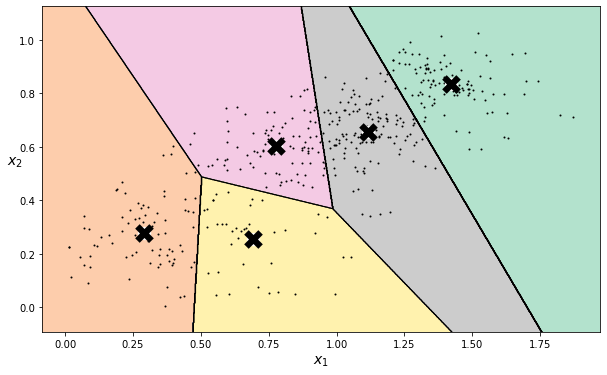

In [88]:
plt.figure(figsize=(10, 6))
plot_decision_boundaries(kmeans2, examples2)
plt.show()

### Accuracy

In [89]:
kmeans.inertia_

111.82331677692727

In [90]:
kmeans2.inertia_

11.354670179924353

verifying inertia - inertia is the sum of the squared distances between each training instance and its closest centroid:

In [91]:
X_dist = kmeans.transform(examples)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

111.82331677692756

In [92]:
X_dist2 = kmeans2.transform(examples2)
np.sum(X_dist2[np.arange(len(X_dist2)), kmeans2.labels_]**2)

11.35467017992437

The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "great is better" rule.

In [93]:
kmeans.score(examples)

-111.8233167769273

In [94]:
kmeans2.score(examples2)

-11.354670179924355

## Finding the optimal number of clusters

### The Elbow method

Plot the inertia as a function of 𝑘 and analyze the resulting curve:

In [95]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(examples)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


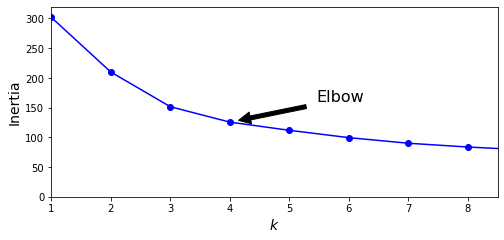

In [96]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 320])
plt.show()

In [97]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(examples2)
                for k in range(1, 10)]
inertias2 = [model.inertia_ for model in kmeans_per_k2]

C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


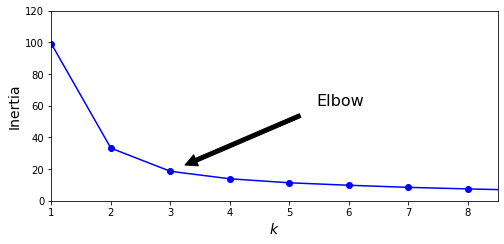

In [98]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias2[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 120])
plt.show()

As you can see, there is an elbow at 𝑘=3 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So 𝑘=3 is a pretty good choice. With the examples shown below it is difficult to comment whether the clusters make sense given the nature of the data (no obvious 'blobs')

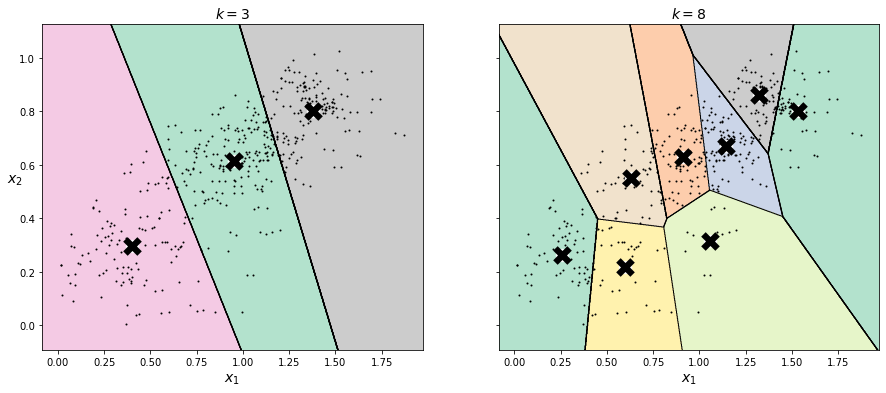

In [99]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, examples2, "$k=3$", "$k=8$")
plt.show()

#### Note: K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes

### The Silhouette Method

Code below is taken and modified from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

The silhouette method gives the seperation distance between resulting clusters. The plots below show a measure of how close each point in one cluster is to the points in the neighbouring clusters. Best value for silhouette score is 1 and the worst is -1. Values near 0 indicate overlapping clusters. Negative clusters generally indicate that a sample has been assigned to the wrong cluster as a different cluster would be more similar. Running it on my data (examples 2) shows that n=2 is the best number of clusters (highest score), and increasing n thereafter decreases the score everytime. 

For n_clusters = 2 The average silhouette_score is : 0.5537646293253689
For n_clusters = 3 The average silhouette_score is : 0.48100207877197215
For n_clusters = 4 The average silhouette_score is : 0.43763407493002254
For n_clusters = 5 The average silhouette_score is : 0.4277826702784006
For n_clusters = 6 The average silhouette_score is : 0.40111146552814236
For n_clusters = 7 The average silhouette_score is : 0.3713573302583153
For n_clusters = 8 The average silhouette_score is : 0.3675030596642149


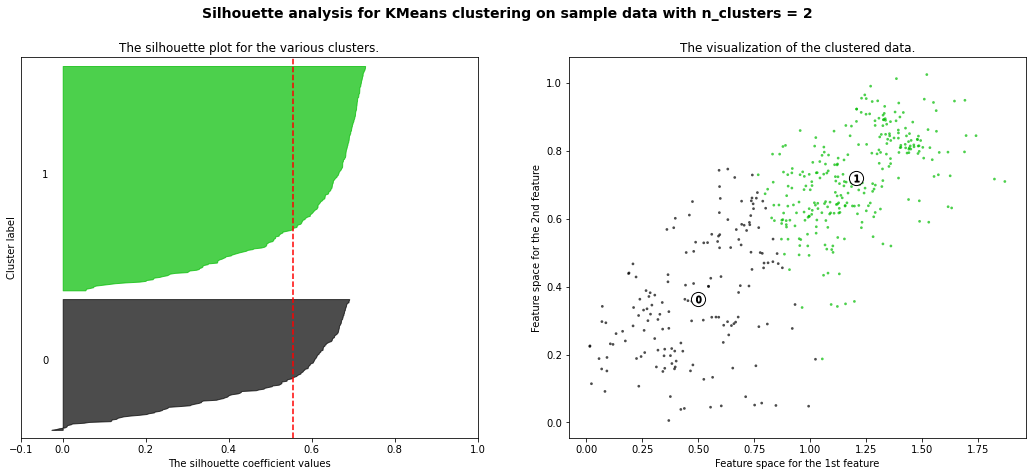

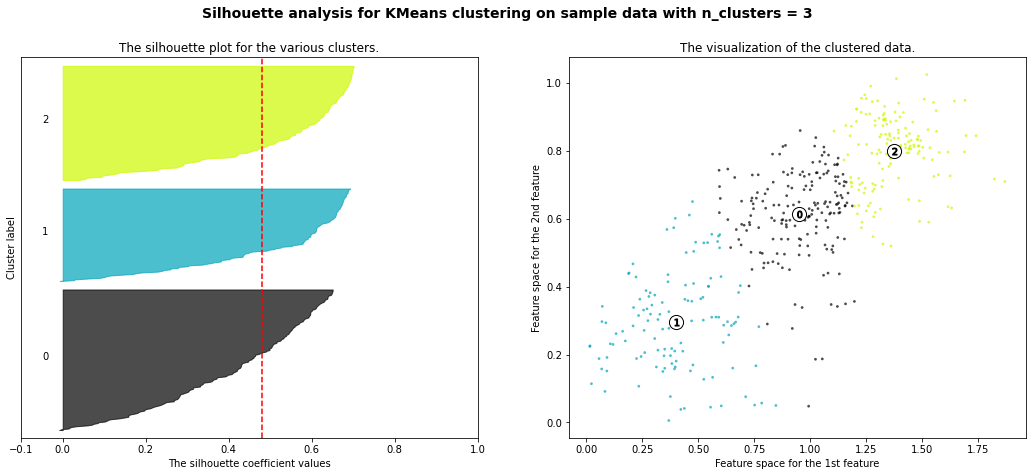

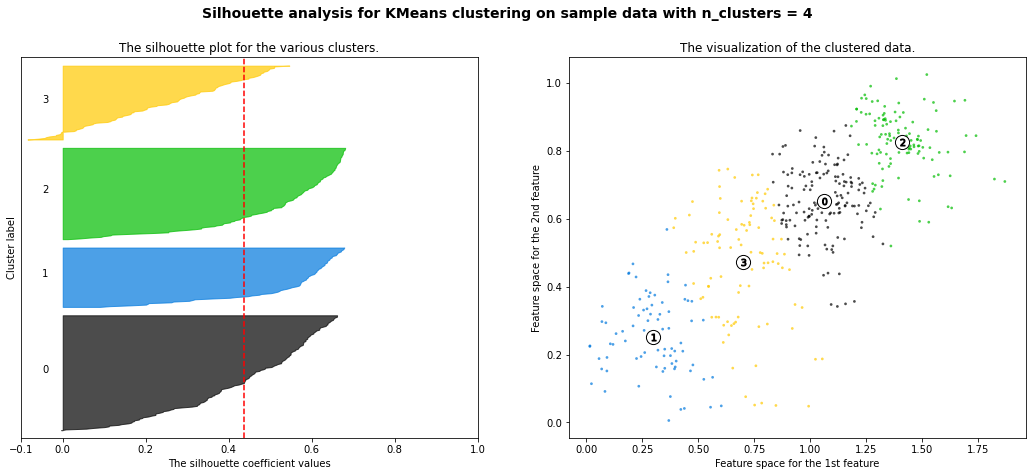

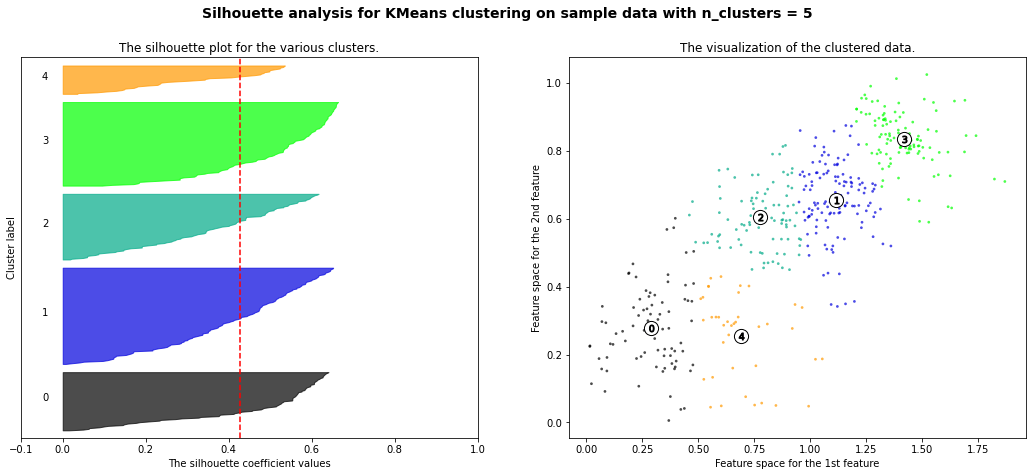

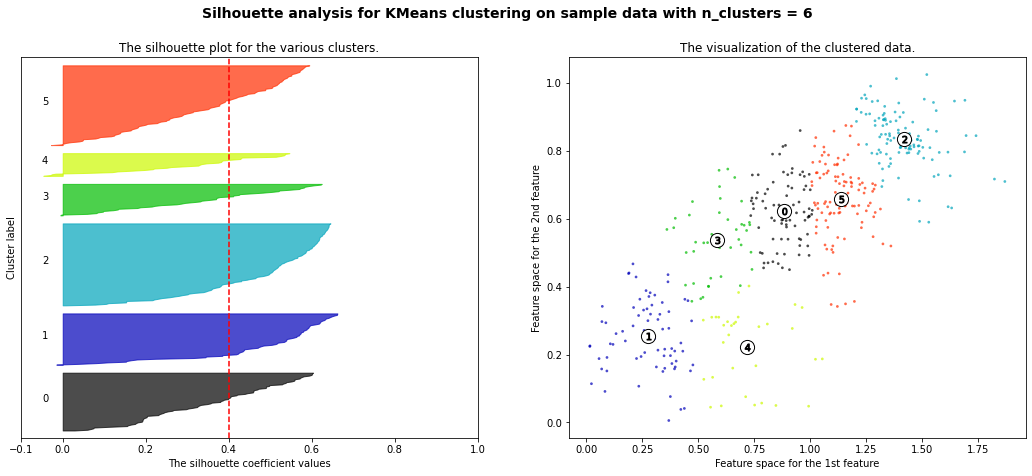

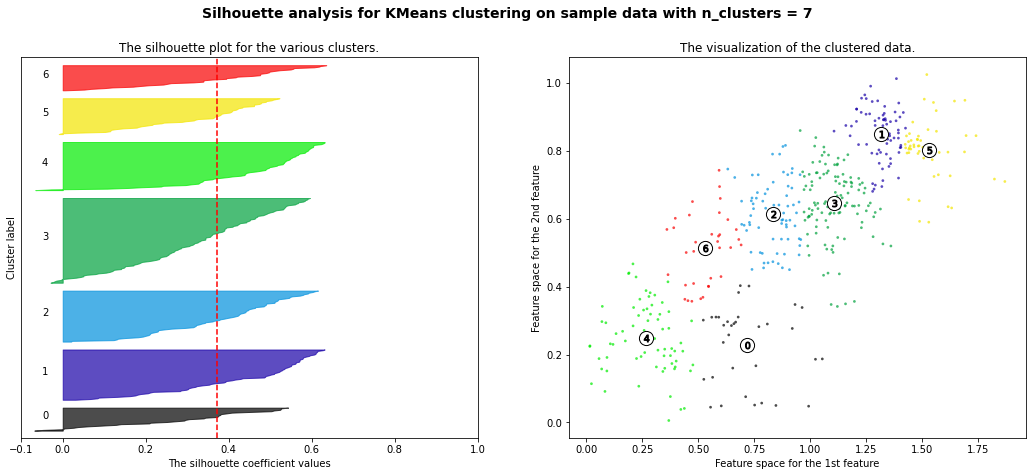

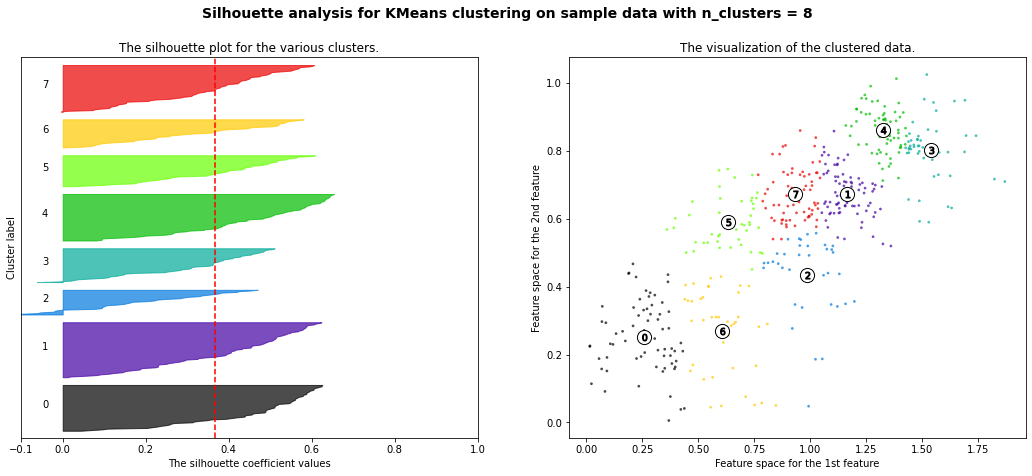

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(examples2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(examples2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(examples2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(examples2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mpl.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = mpl.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        examples2.iloc[:, 0], examples2.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Gaussian Mixture Model

"A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians."

"The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models."

In [101]:
from sklearn.mixture import GaussianMixture

gm2 = GaussianMixture(n_components=2, random_state=0, n_init=10)
gm2.fit(examples2)
gm2.means_

array([[1.15671979, 0.718622  ],
       [0.50364664, 0.32291561]])

In [102]:
gm2.score(examples2)

0.12626051677030828

In [103]:
# shows how many iterations it took for the algorithm to converge
gm2.n_iter_

7

**Run on examples instead of examples 2**

In [104]:
gm = GaussianMixture(n_components=2, random_state=0, n_init=10)
gm.fit(examples)
gm.means_

array([[1.34386839, 1.2178343 , 0.77959042, 0.53551129, 0.25992554,
        2.36330505],
       [0.80351362, 0.92483338, 0.52295541, 0.36441384, 0.14719683,
        1.99693196]])

In [105]:
gm.score(examples)

0.8701786047014121

In [106]:
# shows how many iterations it took for the algorithm to converge
gm.n_iter_


34

C:\Users\joe\AppData\Local\Temp/ipykernel_4680/971273417.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(
C:\Users\joe\AppData\Local\Temp/ipykernel_4680/971273417.py:14: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


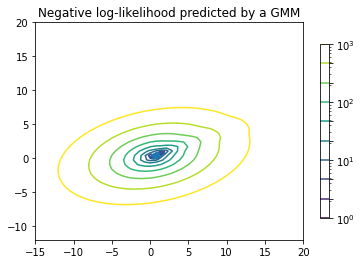

In [107]:
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(-15.0, 20.0)
y = np.linspace(-12.0, 20.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gm2.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(examples2.iloc[:, 0], examples2.iloc[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [108]:
gm_ypred = gm.fit_predict(examples)

### Selecting number of clusters for Gaussian Mixture Model

Need to find the model that minimizes a theoretical information criterion such as Bayesian (BIC) information criterion or the Akaike information criterion (AIC)

C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known

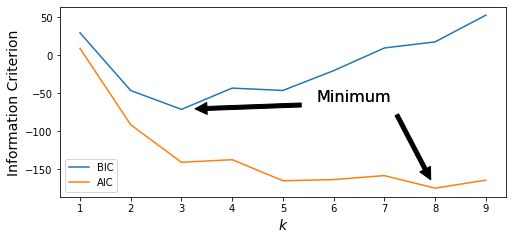

In [109]:
gm_per_k = [GaussianMixture(n_components=k, random_state=0, n_init=10).fit(examples2)
                for k in range(1, 10)]
bic = [model.bic(examples2) for model in gm_per_k]
aic = [model.aic(examples2) for model in gm_per_k]

tic_scores = {'BIC': bic, 'AIC': aic}
tic_scores_df = pd.DataFrame(data=tic_scores)
# tic_scores_df.plot.line()


plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), bic, label = "BIC")
plt.plot(range(1, 10), aic, label = "AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.annotate('Minimum',
             xy=(3, bic[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.annotate('Minimum',
             xy=(8, aic[7]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

From looking at the BIC and AIC scores for different k values, BIC suggests that 3 would be the most suitable number of clusters, and AIC suggests that 8 is the most suitable number of clusters

Below the same is run again but with multiple attributes (examples) as apposed to just 2 (examples2)

C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known

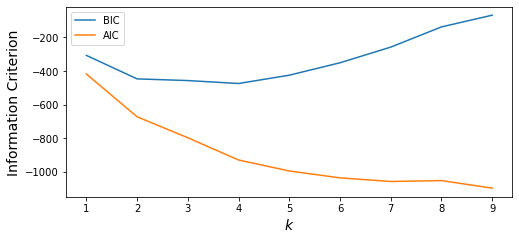

In [110]:
gm_per_k = [GaussianMixture(n_components=k, random_state=0, n_init=10).fit(examples)
                for k in range(1, 10)]
bic = [model.bic(examples) for model in gm_per_k]
aic = [model.aic(examples) for model in gm_per_k]

tic_scores = {'BIC': bic, 'AIC': aic}
tic_scores_df = pd.DataFrame(data=tic_scores)
# tic_scores_df.plot.line()


plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), bic, label = "BIC")
plt.plot(range(1, 10), aic, label = "AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
# plt.annotate('Minimum',
#              xy=(3, bic[2]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.annotate('Minimum',
#              xy=(8, aic[7]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend()
plt.show()

## Hierarchical clustering

"Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample."

"The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

- **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.

- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

In [111]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering().fit(examples2)
ac.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [112]:
ac_ypred = ac.fit_predict(examples)

## Comparing the different algorithms 

Adjusted rand index is used here as a comparison metric between the algorithms. It's a popular method for measuring the similarity of two ways of assigning discrete labels to the data, ignoring permutations of the labels themselves. Instead of checking whether the raw class/cluster labels match, you'd look at pairs of points and ask: to what extent are pairs in the same class assigned to the same cluster, and pairs in different classes assigned to different clusters?

ARI ranges from -1 to 1, where negative and near-zero values indicate chance-level labelings, positive values indicate similar labelings, and 1 indicates perfect agreement.

The ground truth labels are taken as the binned class attribute from part 1.

In [113]:
labels_true = df_copy["Happiness Bins"]
labels_true

0      5
1      5
2      5
3      5
4      5
      ..
149    1
150    1
151    1
152    1
153    1
Name: Happiness Bins, Length: 450, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [114]:
from sklearn.metrics.cluster import adjusted_rand_score

### K-means

In [115]:
adjusted_rand_score(labels_true, y_pred)

0.21959753983703387

### Gaussian Mixture Model

In [116]:
adjusted_rand_score(labels_true,gm_ypred)

0.17064230354225754

### Hierarchical clustering

In [117]:
adjusted_rand_score(labels_true, ac_ypred)

0.11580160251559615

### Naive Bayes Classifier

In [118]:
adjusted_rand_score(labels_true, yPred1)

0.30198216678098216

From the scores above we can see that the Naive Bayes classifier 

# Part 3

## Making test set

In [119]:
df2_copy

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,Happiness Bins
0,1.396510,1.349510,0.941430,0.665570,0.419780,2.517380,5
1,1.302320,1.402230,0.947840,0.628770,0.141450,2.702010,5
2,1.325480,1.360580,0.874640,0.649380,0.483570,2.492040,5
3,1.459000,1.330950,0.885210,0.669730,0.365030,2.465310,5
4,1.326290,1.322610,0.905630,0.632970,0.329570,2.451760,5
...,...,...,...,...,...,...,...
149,0.305445,0.431883,0.247106,0.380426,0.196896,1.837229,1
150,0.368746,0.945707,0.326425,0.581844,0.252756,0.540061,1
151,0.777153,0.396103,0.500533,0.081539,0.493664,1.061574,1
152,0.511136,1.041990,0.364509,0.390018,0.354256,0.621130,1


In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df2_copy, test_size=0.2, random_state=42)

In [121]:
len(train_set)

360

In [122]:
len(test_set)

90

^^ Maybe not enough instances in the test set but we'll see

In [123]:
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)

## Decision Trees - Training Set

In [124]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

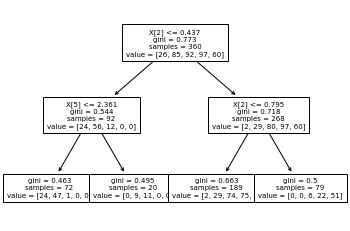

In [125]:
plot_tree(tree_clf, fontsize=7);

In [126]:
def metrics(x, y, clf):
    print("10-fold cross validation score")
    print(np.mean(cross_val_score(clf,x,y,cv=10,scoring="accuracy")))
    yPred = cross_val_predict(clf,x,y,cv=3)
    cm = confusion_matrix(y, yPred)
    print('TP')
    print(np.mean(np.diag(cm)).astype(float))
    print('FP')
    print(np.mean(cm.sum(axis=0) - np.diag(cm)).astype(float))
    print('Precission')
    print(precision_score(y, yPred, average='macro'))
    print('Recall')
    print(recall_score(y, yPred, average='macro'))
    print('F-Measure')
    print(f1_score(y, yPred, average='macro'))
    print('ROC-AUC')
    predProb = clf.predict_proba(x)
    print(roc_auc_score(y, predProb, average='macro', multi_class='ovr'))
    
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.46944444444444444
TP
35.8
FP
36.2
Precission
0.408939900751779
Recall
0.4466235135919002
F-Measure
0.4266523174758469
ROC-AUC
0.8162160572504054


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The decision tree classifier performs worse than the Naive Bayes classifier

## Decision Trees - Training and Test Set

Testing the classifier using the test set

In [127]:
y_test = test_set["Happiness Bins"]
x_test = test_set.drop(["Happiness Bins"],axis=1)
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.45555555555555555
TP
7.0
FP
11.0
Precission
0.36855931166275996
Recall
0.3493871635610766
F-Measure
0.33726892109500806
ROC-AUC
0.76659680672798


Does not generalise well to new data

## Decision Tree Parameters

### Changing Tree Depth

- Increasing the max depth always increases the ROC-AUC score on training data
- ROC-AUC score for unseen test data only increases for max_depth = 3 and 4.
- ROC-AUC score for max_depth = 8 is about the same as max_depth = 4
- Seeing that the ROC-AUC score is always lower for unseen data, it may suggest that the classifier is overfitting

### Max Depth = 3

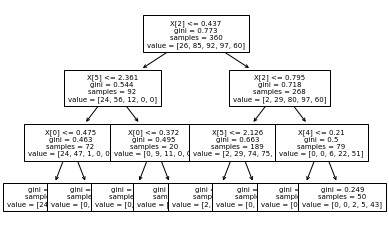

In [128]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [129]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.5750000000000001
TP
39.8
FP
32.2
Precission
0.5513843622499671
Recall
0.5344301569884927
F-Measure
0.5375761166595994
ROC-AUC
0.889655072517258


In [130]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.4111111111111111
TP
8.0
FP
10.0
Precission
0.44339743589743585
Recall
0.4242867494824017
F-Measure
0.4239358288770054
ROC-AUC
0.8017882313145975


### Max Depth = 4

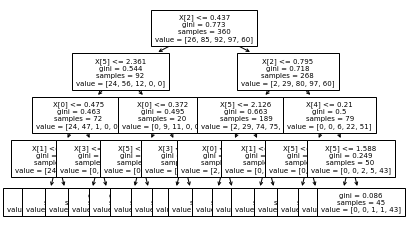

In [131]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [132]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6194444444444445
TP
44.0
FP
28.0
Precission
0.6126009598595132
Recall
0.6112220710095576
F-Measure
0.6039141411663451
ROC-AUC
0.9366904477252487


In [133]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.4666666666666666
TP
9.8
FP
8.2
Precission
0.5503781004234725
Recall
0.5574585921325053
F-Measure
0.5496270396270396
ROC-AUC
0.8400039699511386


### Max Depth = 8

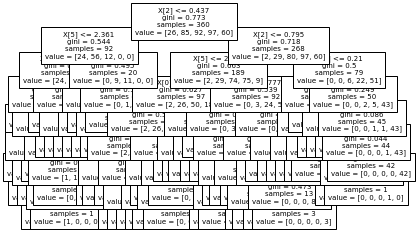

In [134]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [135]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.65
TP
45.6
FP
26.4
Precission
0.6374815326012764
Recall
0.6336969873975173
F-Measure
0.6338758846802541
ROC-AUC
0.9988431990031964


In [136]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.5444444444444445
TP
9.4
FP
8.6
Precission
0.5132110536522301
Recall
0.5240931677018634
F-Measure
0.5116709956709957
ROC-AUC
0.8215442731939804


### Minimum number of samples a leaf node must have

This parameter made no difference to the performance of the classifier

### Min Samples Split = 2

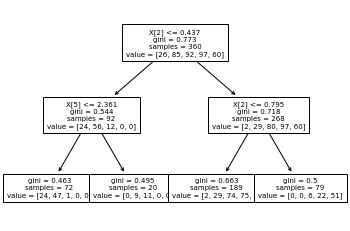

In [137]:
tree_clf = DecisionTreeClassifier(min_samples_split = 2, random_state=42, max_depth = 2)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [138]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.46944444444444444
TP
35.8
FP
36.2
Precission
0.408939900751779
Recall
0.4466235135919002
F-Measure
0.4266523174758469
ROC-AUC
0.8162160572504054


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.45555555555555555
TP
7.0
FP
11.0
Precission
0.36855931166275996
Recall
0.3493871635610766
F-Measure
0.33726892109500806
ROC-AUC
0.76659680672798


### Min Samples Split = 4

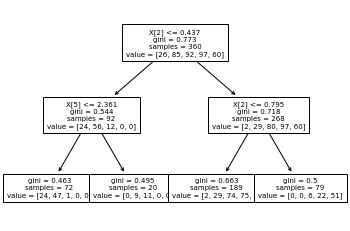

In [140]:
tree_clf = DecisionTreeClassifier(min_samples_split = 4, random_state=42, max_depth = 2)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [141]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.46944444444444444
TP
35.8
FP
36.2
Precission
0.408939900751779
Recall
0.4466235135919002
F-Measure
0.4266523174758469
ROC-AUC
0.8162160572504054


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.45555555555555555
TP
7.0
FP
11.0
Precission
0.36855931166275996
Recall
0.3493871635610766
F-Measure
0.33726892109500806
ROC-AUC
0.76659680672798


### Maximum Number of Leaf Nodes

### Max Leaf Nodes = 2

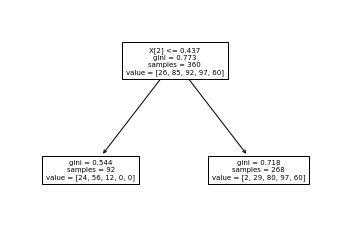

In [143]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=42, max_depth = 2)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [144]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.36666666666666664
TP
28.0
FP
44.0
Precission
0.3279497923128548
Recall
0.3227688278359304
F-Measure
0.3105878870445794
ROC-AUC
0.7071947779884437


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Leaf Nodes = 4

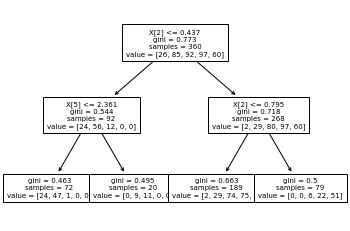

In [145]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42, max_depth = 2)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [146]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.46944444444444444
TP
35.8
FP
36.2
Precission
0.408939900751779
Recall
0.4466235135919002
F-Measure
0.4266523174758469
ROC-AUC
0.8162160572504054


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Leaf Nodes = 8

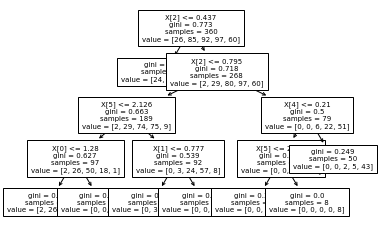

In [147]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42, max_depth = 10)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [148]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.5861111111111111
TP
42.4
FP
29.6
Precission
0.5990259216868441
Recall
0.5450688806364183
F-Measure
0.545394734524286
ROC-AUC
0.8862328384357673


## 30% Test Set

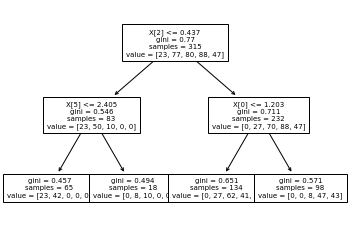

In [149]:
train_set, test_set = train_test_split(df2_copy, test_size=0.3, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [150]:
y_test = test_set["Happiness Bins"]
x_test = test_set.drop(["Happiness Bins"],axis=1)
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.451008064516129
TP
27.6
FP
35.4
Precission
0.36716524216524216
Recall
0.38307336280740534
F-Measure
0.373179955451417
ROC-AUC
0.8339074453193973


In [151]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.34065934065934067
TP
10.0
FP
17.0
Precission
0.40382460306988605
Recall
0.3478516016016016
F-Measure
0.3546166114587167
ROC-AUC
0.7659462947461547


- accuracy of the training data is slightly better than the test data

## 60% Test Set

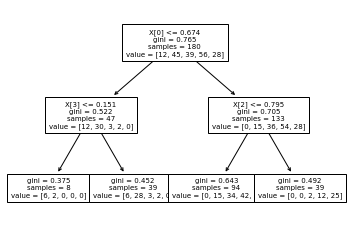

In [152]:
train_set, test_set = train_test_split(df2_copy, test_size=0.6, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf, fontsize=7);

In [153]:
y_test = test_set["Happiness Bins"]
x_test = test_set.drop(["Happiness Bins"],axis=1)
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.4833333333333333
TP
18.0
FP
18.0
Precission
0.527131888601154
Recall
0.47577533577533576
F-Measure
0.4630556028079248
ROC-AUC
0.8242447102552166


In [154]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.4629629629629629
TP
24.0
FP
30.0
Precission
0.43047384168785924
Recall
0.39177914476827513
F-Measure
0.3869496377614484
ROC-AUC
0.7495124582819631


- accuracy of the training data is higher than the test data

## Random Forests Decision Trees

In [155]:
train_set, test_set = train_test_split(df2_copy, test_size=0.2, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)


from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [156]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6138888888888889
TP
44.6
FP
27.4
Precission
0.5128848482792543
Recall
0.5442458758492192
F-Measure
0.5273359773260072
ROC-AUC
0.9125207255602049


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.8903481745731024


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Changing Parameters

### Changing Max Tree Depth

### Max Depth = 3

In [158]:
tree_clf = RandomForestClassifier(max_depth=3, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [159]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6444444444444445
TP
47.0
FP
25.0
Precission
0.5452252763564637
Recall
0.5682769530941018
F-Measure
0.5544930846024319
ROC-AUC
0.9499017548139996


In [160]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.6222222222222221
TP
34.2
FP
19.8
Precission
0.671487704609346
Recall
0.5865852444656792
F-Measure
0.5959877280404225
ROC-AUC
0.9277798586091883


### Max Depth = 4

In [161]:
tree_clf = RandomForestClassifier(max_depth=4, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [162]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6805555555555556
TP
49.6
FP
22.4
Precission
0.7111277927217207
Recall
0.6242418532768415
F-Measure
0.636381168860141
ROC-AUC
0.9783467798805224


In [163]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.6481481481481481
TP
35.4
FP
18.6
Precission
0.7168742681018896
Recall
0.6053297698678133
F-Measure
0.6199394439653896
ROC-AUC
0.9580640293165082


### Max Depth = 8

In [164]:
tree_clf = RandomForestClassifier(max_depth=8, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [165]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.7555555555555556
TP
52.8
FP
19.2
Precission
0.7480114036863662
Recall
0.690773178974724
F-Measure
0.7095567907130006
ROC-AUC
1.0


In [166]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.6814814814814815
TP
38.8
FP
15.2
Precission
0.7259231215938533
Recall
0.6875064699792961
F-Measure
0.6992173471348947
ROC-AUC
0.9920083328167578


### Minimum number of samples a leaf node must have

- This parameter had no effect on the performance of teh classifier

### Min Leaf Nodes = 2

In [167]:
tree_clf = RandomForestClassifier(min_samples_split=2, max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [168]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6138888888888889
TP
44.6
FP
27.4
Precission
0.5128848482792543
Recall
0.5442458758492192
F-Measure
0.5273359773260072
ROC-AUC
0.9125207255602049


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.8903481745731024


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Min Leaf Nodes = 4

In [170]:
tree_clf = RandomForestClassifier(min_samples_split=4, max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_split=4, random_state=42)

In [171]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6138888888888889
TP
44.6
FP
27.4
Precission
0.5128848482792543
Recall
0.5442458758492192
F-Measure
0.5273359773260072
ROC-AUC
0.9125207255602049


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.8903481745731024


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Maximum Number of Leaf Nodes

### Max Leaf Nodes = 2

In [173]:
tree_clf = RandomForestClassifier(max_leaf_nodes=2, max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=2, random_state=42)

In [174]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.5611111111111111
TP
39.0
FP
33.0
Precission
0.46330212613098043
Recall
0.45791415086877424
F-Measure
0.44907580683228393
ROC-AUC
0.85467535060592


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.5555555555555556
TP
30.0
FP
24.0
Precission
0.4838572487887557
Recall
0.4812042124542124
F-Measure
0.46959157581961175
ROC-AUC
0.8372777216937903


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Leaf Nodes = 4

In [176]:
tree_clf = RandomForestClassifier(max_leaf_nodes=4, max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [177]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6138888888888889
TP
44.6
FP
27.4
Precission
0.5128848482792543
Recall
0.5442458758492192
F-Measure
0.5273359773260072
ROC-AUC
0.9125207255602049


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.8903481745731024


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max Leaf Nodes = 8

In [179]:
tree_clf = RandomForestClassifier(max_leaf_nodes=8, max_depth=10, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=8, random_state=42)

In [180]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6694444444444445
TP
49.0
FP
23.0
Precission
0.7612281144781144
Recall
0.5966488118538109
F-Measure
0.5882401021991736
ROC-AUC
0.9610466986152589


In [181]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.6111111111111112
TP
35.2
FP
18.8
Precission
0.7408383049192162
Recall
0.5915093964007008
F-Measure
0.5915572791616265
ROC-AUC
0.9403918426390462


# 30% Test Set

In [182]:
train_set, test_set = train_test_split(df2_copy, test_size=0.3, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
tree_clf = RandomForestClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [183]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6218750000000001
TP
37.2
FP
25.8
Precission
0.4920737066735765
Recall
0.5213774523348992
F-Measure
0.5049972400845153
ROC-AUC
0.9217728896032641


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.9004330623327264


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Accuracy of the test data is slightly higher

# 60% Test Set

In [185]:
train_set, test_set = train_test_split(df2_copy, test_size=0.6, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
tree_clf = RandomForestClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [186]:
metrics(x_train, y_train, tree_clf)

10-fold cross validation score
0.6111111111111112
TP
21.4
FP
14.6
Precission
0.48516339869281044
Recall
0.48499389499389495
F-Measure
0.46573953919376676
ROC-AUC
0.9303490072024813


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
metrics(x_test, y_test, tree_clf)

10-fold cross validation score
0.611111111111111
TP
32.8
FP
21.2
Precission
0.5110712761416987
Recall
0.5393135849657589
F-Measure
0.5208358737283229
ROC-AUC
0.8671550626602642


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Accuracy of the training and test sets are pretty much identical

# Part 4

## Linear Classifier

In [188]:
from sklearn.linear_model import LinearRegression
train_set, test_set = train_test_split(df2_copy, test_size=0.2, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
y_test = test_set["Happiness Bins"]
x_test = test_set.drop(["Happiness Bins"],axis=1)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

#### Training Data Accuracy

In [189]:
print("Accuracy Score:")
print(lin_reg.score(x_train, y_train))
print("10-fold cross validation score:")
print(np.mean(cross_val_score(lin_reg, x_train, y_train, cv=10)))

Accuracy Score:
0.9330464255216593
10-fold cross validation score:
0.9269351400448886


#### Test Data Accuracy

In [190]:
print("Accuracy Score:")
print(lin_reg.score(x_test, y_test))
print("10-fold cross validation score:")
print(np.mean(cross_val_score(lin_reg, x_test, y_test, cv=10)))

Accuracy Score:
0.9511627080818738
10-fold cross validation score:
0.93333988014765


- The linear classifier generalises well to unseen test data as both accuracy scores have increased

"Data is linearly seperable if there is a hyperplane where the classification is true on one side of the hyperplane and false on the other side. Linear sperability is an intrinsic property of data, and does not depend on the size of the data set. So, to check for linear sperability empirically, check if your classifier (perceptron) can reach 100% (or close) accuracy on the training data set."

- Beacause of the high accuracies of the linear classifier on the training and test data sets, it's likely that the dataset itself is linearly seperable

## Multilayer Perceptron

- In all the tests (apart from the validation fraction) the ROC-AUC of both the training set and unseen test data remained above 0.99 indicating that the classifier is able to distinguish between all positive and negative examples perfectly (higher than the linear classifier)
- The training and test data having the same scores indicates that the classifier generalises well to new data.
- 10-fold cross validation scores were also similar between the training and test data, but were all slightly lower than the cross validation score of the linear classifiers.
- Seeing as the classifier has high accuracy, it would suggest that the data set is linearly seperable (at least to some degree)
- Changing the acivation functions did not really have a perceivable impact on the classifiers performance. However, the Indetity and Relu functions perform marginally better with test data and Identity function performed marginally better with unseen test data

In [191]:
# classifier needs more than 2000 iterations to converge
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=3000).fit(x_train, y_train)

In [192]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [193]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


### Activation Functions

- All activations perform almsot identically to each other
- Indetity and Relu functions perform slightly better with test data
- Identity function performed best for unseen test data

#### Identity

In [194]:
clf = MLPClassifier(random_state=1, max_iter=3000, activation='identity').fit(x_train, y_train)

In [195]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8999999999999998
TP
64.8
FP
7.2
Precission
0.8922710951788406
Recall
0.9040565039586845
F-Measure
0.8977056498789027
ROC-AUC
0.9966771439834682


In [196]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.9
TP
16.2
FP
1.8
Precission
0.9013542013542013
Recall
0.8998416149068322
F-Measure
0.8991550671550671
ROC-AUC
0.9939791984291985


#### Logistic

In [197]:
clf = MLPClassifier(random_state=1, max_iter=3000, activation='logistic').fit(x_train, y_train)

In [198]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8888888888888887
TP
63.4
FP
8.6
Precission
0.8876832166453692
Recall
0.8633091573353131
F-Measure
0.8738171212901011
ROC-AUC
0.9963715719444153


In [199]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8666666666666666
TP
15.4
FP
2.6
Precission
0.8608624869494435
Recall
0.8563602484472049
F-Measure
0.8552360571850827
ROC-AUC
0.994666066066066


#### Tanh

In [200]:
clf = MLPClassifier(random_state=1, max_iter=3000, activation='tanh').fit(x_train, y_train)

In [201]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8888888888888887
TP
64.8
FP
7.2
Precission
0.8922710951788406
Recall
0.9040565039586845
F-Measure
0.8977056498789027
ROC-AUC
0.996727596929493


In [202]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8777777777777779
TP
15.8
FP
2.2
Precission
0.8849427545079719
Recall
0.8793416149068323
F-Measure
0.8787465241738104
ROC-AUC
0.9941481173481173


#### Relu

In [203]:
clf = MLPClassifier(random_state=1, max_iter=3000, activation='relu').fit(x_train, y_train)

In [204]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [205]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


### Size of the hidden layers (number of neurons in the ith hidden layer)

- increasing the size of the hidden layers improves performance of the classifier from 100 to 200
- increasing to 300 has no improvement

In [206]:
clf = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(100)).fit(x_train, y_train)

In [207]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [208]:
clf = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(200)).fit(x_train, y_train)

In [209]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666668
TP
62.2
FP
9.8
Precission
0.8622775481668825
Recall
0.8544907119141832
F-Measure
0.8578383475155797
ROC-AUC
0.9989729850420662


In [210]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8444444444444444
TP
13.0
FP
5.0
Precission
0.7214624505928853
Recall
0.7264503105590062
F-Measure
0.7230662609871535
ROC-AUC
0.9913692654192655


In [211]:
clf = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(300)).fit(x_train, y_train)

In [212]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.875
TP
63.2
FP
8.8
Precission
0.8722949927374183
Recall
0.8728394560941295
F-Measure
0.8725069692921513
ROC-AUC
0.9993872541132515


In [213]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8222222222222223
TP
13.4
FP
4.6
Precission
0.747978321763488
Recall
0.7493312629399587
F-Measure
0.7484821596622838
ROC-AUC
0.985812323862324


### Learning Rate

- Changing the learning rate had no impact on the classifiers performance

#### Constant

In [214]:
clf = MLPClassifier(random_state=1, max_iter=3000, learning_rate='constant').fit(x_train, y_train)

In [215]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [216]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


#### Invscaling (gradually decreases the learning rate at each time step)

In [217]:
clf = MLPClassifier(random_state=1, max_iter=3000, learning_rate='invscaling').fit(x_train, y_train)

In [218]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [219]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


#### Adaptive (keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing)

In [220]:
clf = MLPClassifier(random_state=1, max_iter=3000, learning_rate='adaptive').fit(x_train, y_train)

In [221]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [222]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


### Momentum

- changing the momontum of the classifier has no impact o nits performance

In [223]:
clf = MLPClassifier(random_state=1, max_iter=3000, momentum=1).fit(x_train, y_train)

In [224]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [225]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


In [226]:
clf = MLPClassifier(random_state=1, max_iter=3000, momentum=0.5).fit(x_train, y_train)

In [227]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [228]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


In [229]:
clf = MLPClassifier(random_state=1, max_iter=3000, momentum=0.1).fit(x_train, y_train)

In [230]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.8916666666666666
TP
61.8
FP
10.2
Precission
0.8562769425388022
Recall
0.8574430366567893
F-Measure
0.8564360320977412
ROC-AUC
0.9987685823513879


In [231]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.8111111111111111
TP
12.8
FP
5.2
Precission
0.7214969241285031
Recall
0.7166645962732919
F-Measure
0.7173120126866658
ROC-AUC
0.9911433125433126


### Validation Fraction (The proportion of training data to set aside as validation set for early stopping)

- setting the validation fraction reduces the performance of the classifier drastically 

In [232]:
clf = MLPClassifier(random_state=1, max_iter=3000, validation_fraction=0.1,early_stopping=True).fit(x_train, y_train)

In [233]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.27222222222222225
TP
20.0
FP
52.0
Precission
0.17725172517251725
Recall
0.20692488201017745
F-Measure
0.11048205489092189
ROC-AUC
0.6724050850310576


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.2666666666666667
TP
5.2
FP
12.8
Precission
0.12882882882882882
Recall
0.22400000000000003
F-Measure
0.13013947847180107
ROC-AUC
0.681361073062002


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
clf = MLPClassifier(random_state=1, max_iter=3000, validation_fraction=0.2,early_stopping=True).fit(x_train, y_train)

In [236]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.3472222222222222
TP
19.4
FP
52.6
Precission
0.21977058029689606
Recall
0.20214473418233272
F-Measure
0.10370063912448817
ROC-AUC
0.8455373380884914


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.3
TP
5.4
FP
12.6
Precission
0.16301369863013698
Recall
0.23199999999999998
F-Measure
0.14431818181818185
ROC-AUC
0.7860099839374968


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
clf = MLPClassifier(random_state=1, max_iter=3000, validation_fraction=0.4,early_stopping=True).fit(x_train, y_train)

In [239]:
metrics(x_train, y_train, clf)

10-fold cross validation score
0.3194444444444445
TP
22.6
FP
49.4
Precission
0.3465000399411752
Recall
0.2497760610295216
F-Measure
0.19874314410888086
ROC-AUC
0.750435386525558


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
metrics(x_test, y_test, clf)

10-fold cross validation score
0.3111111111111111
TP
5.2
FP
12.8
Precission
0.1176190476190476
Recall
0.22260869565217392
F-Measure
0.14468308014667364
ROC-AUC
0.7283315204361877


C:\Users\joe\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Convolutional Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
train_set, test_set = train_test_split(df2_copy, test_size=0.2, random_state=42)
y_train = train_set["Happiness Bins"]
x_train = train_set.drop(["Happiness Bins"],axis=1)
y_test = test_set["Happiness Bins"]
x_test = test_set.drop(["Happiness Bins"],axis=1)

NameError: name 'train_test_split' is not defined

In [188]:
x_test.shape

(90, 6)

In [189]:
x_train = x_train.to_numpy()
x_train = x_train.reshape(360, 1, 6)

In [190]:
y_train = y_train.to_numpy()
y_train = y_train.reshape(360)

In [191]:
x_test = x_test.to_numpy()
x_test = x_test.reshape(90, 1, 6)

In [192]:
y_test = y_test.to_numpy()
y_test = y_test.reshape(90)

In [193]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(300, 1, activation="relu", input_shape=x_train.shape))
model.add(keras.layers.Conv1D(100, 1, activation="relu"))
model.add(keras.layers.Dense(6, activation="softmax"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 360, 1, 300)       2100      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 360, 1, 100)       30100     
_________________________________________________________________
dense_10 (Dense)             (None, 360, 1, 6)         606       
Total params: 32,806
Trainable params: 32,806
Non-trainable params: 0
_________________________________________________________________


In [194]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

In [202]:
clf = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 748us/step - loss: 0.3211 - accuracy: 0.8861
Epoch 2/100
12/12 [==============================] - 0s 665us/step - loss: 0.3142 - accuracy: 0.8861
Epoch 3/100
12/12 [==============================] - 0s 831us/step - loss: 0.2975 - accuracy: 0.9111
Epoch 4/100
12/12 [==============================] - 0s 665us/step - loss: 0.2958 - accuracy: 0.9194
Epoch 5/100
12/12 [==============================] - 0s 582us/step - loss: 0.2833 - accuracy: 0.9028
Epoch 6/100
12/12 [==============================] - 0s 665us/step - loss: 0.2829 - accuracy: 0.9167
Epoch 7/100
12/12 [==============================] - 0s 665us/step - loss: 0.2939 - accuracy: 0.9139
Epoch 8/100
12/12 [==============================] - 0s 582us/step - loss: 0.2875 - accuracy: 0.9028
Epoch 9/100
12/12 [==============================] - 0s 831us/step - loss: 0.2643 - accuracy: 0.9111
Epoch 10/100
12/12 [==============================] - 0s 665us/step - loss: 0.2731 - accura

In [203]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
test_acc

0.9666666388511658

In [207]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv1D(300, 1, activation="relu", input_shape=(1,6)))
model2.add(keras.layers.LocallyConnected1D(64, 3, input_shape=x_train.shape))
model2.add(keras.layers.Conv1D(100, 1, activation="relu"))
model2.add(keras.layers.Dense(6, activation="softmax"))
model2.summary()

ValueError: Input 0 of layer locally_connected1d is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 360, 1, 300]